In [1]:
import pandas as pd

data = pd.read_csv('Drug_Consumption.csv')

Text(0.5, 0.98, 'Ethnicity')

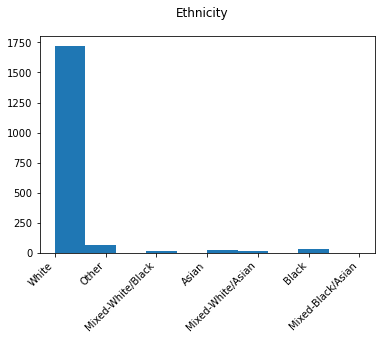

In [2]:
import matplotlib.pyplot as plt
plt.hist(data['Ethnicity'])
plt.xticks(rotation=45, ha='right')
plt.suptitle("Ethnicity")

In [3]:
n_data = data.drop('ID', axis = 1)

In [4]:
drugs = list(n_data.columns)[12:]

In [5]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [6]:
for column in drugs:
    n_data[column] = n_data[column].apply(drug_encoder)

In [7]:
import numpy as np

In [8]:
n_data['target'] = np.where(n_data['Coke'] == 0, 0, 1)

# Target is Coke which Cocaine

In [114]:
import numpy as np
f_data = n_data.drop(drugs, axis = 1)
f_data['Ethnicity'] = np.where(f_data['Ethnicity'] == 'White', 1, 0)

In [115]:
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country'])

In [116]:
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)

In [117]:
f_df_target.value_counts()

0    1037
1     847
Name: target, dtype: int64

In [118]:
from fairlearn.metrics import MetricFrame

# Classification Algorithm

In [135]:
import sklearn
from sklearn import metrics

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)

# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

lr0 = roc_auc_score(y_test, lr_preds)
lr0_f1 = f1_score(y_test, lr_preds)
lr0_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr0)
print(lr0_f1)
print(lr0_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.6662700061702744
0.621676891615542
0.33528433401470226


array([[229,  80],
       [105, 152]])

In [122]:
from fairlearn.metrics import MetricFrame
gm = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=lr_preds, sensitive_features=X_test['Ethnicity'])
gm.by_group

Ethnicity
0    0.752381
1    0.655805
Name: roc_auc_score, dtype: object

# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 16, random_state = 121)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)
dt0 = roc_auc_score(y_test, dt_preds)
dt0_f1 = f1_score(y_test, dt_preds)
dt0_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt0)
print(dt0_f1)
print(dt0_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.6449447823404229
0.6300164960396913
0.6196529535466485
0.6115434500648509
Next
0.6446173800259404
0.6270887638044149
0.6212332993338623
0.6124878798181659
Next
0.6449447823404229
0.6168582375478926
0.2891322641011794


array([[205, 104],
       [ 96, 161]])

In [133]:
gm1 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=dt_preds, sensitive_features=X_test['Ethnicity'])
gm1.by_group

Ethnicity
0    0.704762
1    0.638083
Name: roc_auc_score, dtype: object

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 6, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
rf0 = roc_auc_score(y_test, rf_preds)
rf0_f1 = f1_score(y_test, rf_preds)
rf0_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf0)
print(rf0_f1)
print(rf0_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix


0.6915618349640487
0.6828353040434185
0.6873811592560412
0.6870537569415587
Next
0.6915618349640487
0.6828353040434185
0.6873811592560412
0.6870537569415587
Next
0.6714895546069283
0.6640348557540957
0.6698714316295821
0.6731076775842746
Next
0.6714895546069283
0.6640348557540957
0.6698714316295821
0.6731076775842746
Next
0.6915618349640487
0.6573705179282868
0.38463483394647346


array([[229,  80],
       [ 92, 165]])

In [138]:
gm2 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=rf_preds, sensitive_features=X_test['Ethnicity'])
gm2.by_group

Ethnicity
0    0.428571
1    0.434848
Name: roc_auc_score, dtype: object

# Gradient Boosting Machine

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train, y_train)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train, y_train)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)
gb0 = roc_auc_score(y_test, gb_preds)
gb0_f1 = f1_score(y_test, gb_preds)
gb0_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb0)
print(gb0_f1)
print(gb0_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.6646518831929281
0.6769798395728659
Next
0.6909070303350837
0.6607986097994031
Next
0.6909070303350837
0.6546184738955824
0.3838247022038812


array([[231,  78],
       [ 94, 163]])

In [139]:
gm3 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=gb_preds, sensitive_features=X_test['Ethnicity'])
gm3.by_group

Ethnicity
0    0.385714
1    0.447884
Name: roc_auc_score, dtype: object

# Support vector machine

In [140]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train, y_train)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train, y_train)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train, y_train)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 0.1, C = 1, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train, y_train)
sv_preds = sv_clf.predict(X_test)
sv0 = roc_auc_score(y_test, sv_preds)
sv0_f1 = f1_score(y_test, sv_preds)
sv0_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv0)
print(sv0_f1)
print(sv0_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.5
0.6773072418873484
0.6571594071499628
Next
0.5282573382191833
0.6789064762696284
0.6666162970798232
Next
0.555532469494919
0.6552516590482667
0.6721254706408271
Next
0.6789064762696284
0.6367346938775511
0.3606467907956694


array([[232,  77],
       [101, 156]])

In [142]:
gm4 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=sv_preds, sensitive_features=X_test['Ethnicity'])
gm4.by_group

Ethnicity
0    0.780952
1    0.668873
Name: roc_auc_score, dtype: object

# Using SMOTE to solve imbalance

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
f_data = n_data.drop(drugs, axis = 1)
f_data['Ethnicity'] = np.where(f_data['Ethnicity'] == 'White', 1, 0)
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country'])
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)

In [22]:
X_train['target'] = y_train

/var/folders/bn/qc5vfhgd70b9bh2v45b8_nhr0000gn/T/ipykernel_41509/733523931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['target'] = y_train


In [23]:
X_train_target = X_train['Ethnicity']
X_train_predi = X_train.drop('Ethnicity', axis = 1)

In [24]:
smt = SMOTE(random_state = 121)
X_train_sm, y_train_sm = smt.fit_resample(X_train_predi, X_train_target)

In [25]:
X_train_sm['Ethnicity'] = y_train_sm
y_train_sm = X_train_sm['target']
X_train_sm = X_train_sm.drop('target', axis = 1)

# Logistic regression with SMOTE

In [144]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_sm, y_train_sm)
lr_preds = lr_clf.predict(X_test)

lr1 = roc_auc_score(y_test, lr_preds)
lr1_f1 = f1_score(y_test, lr_preds)
lr1_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr1)
print(lr1_f1)
print(lr1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.48825129386876204
0.5976714100905564
-0.02166064981949445


array([[ 24, 285],
       [ 26, 231]])

In [145]:
gm_m = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=lr_preds, sensitive_features=X_test['Ethnicity'])
gm_m.by_group

Ethnicity
0    0.42381
1    0.49383
Name: roc_auc_score, dtype: object

# Decision Tree with SMOTE

In [146]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train_sm, y_train_sm)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train_sm, y_train_sm)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 16, random_state = 121)
dt_clf.fit(X_train_sm, y_train_sm)
dt_preds = dt_clf.predict(X_test)
dt1 = roc_auc_score(y_test, dt_preds)
dt1_f1 = f1_score(y_test, dt_preds)
dt1_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt1)
print(dt1_f1)
print(dt1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.428733330814854
0.45682067167844054
0.45969173812851805
0.4570914082077242
Next
0.428733330814854
0.45325702340926544
0.42049160716759226
0.42374674171735105
Next
0.428733330814854
0.47962382445141066
-0.13697254256567892


array([[ 81, 228],
       [104, 153]])

In [147]:
gm_m1 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=dt_preds, sensitive_features=X_test['Ethnicity'])
gm_m1.by_group

Ethnicity
0    0.438095
1    0.427997
Name: roc_auc_score, dtype: object

# RandomForest with SMOTE

In [148]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 10, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train_sm, y_train_sm)
rf_preds = rf_clf.predict(X_test)
rf1 = roc_auc_score(y_test, rf_preds)
rf1_f1 = f1_score(y_test, rf_preds)
rf1_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf1)
print(rf1_f1)
print(rf1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix


0.43769282107463514
0.4196416203896087
0.4374409731404178
0.42025864782844113
Next
0.43769282107463514
0.4196416203896087
0.4374409731404178
0.42025864782844113
Next
0.45905582209461926
0.4166761109641998
0.419950134109025
0.44422197876921915
Next
0.45905582209461926
0.4166761109641998
0.419950134109025
0.44422197876921915
Next
0.419950134109025
0.45705024311183146
-0.1548769048982226


array([[ 90, 219],
       [116, 141]])

In [150]:
gm_m2 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=rf_preds, sensitive_features=X_test['Ethnicity'])
gm_m2.by_group

Ethnicity
0    0.342857
1    0.424703
Name: roc_auc_score, dtype: object

# Gradient boosting with SMOTE

In [151]:
n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train_sm, y_train_sm)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train_sm, y_train_sm)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train_sm, y_train_sm)
gb_preds = gb_clf.predict(X_test)
gb1 = roc_auc_score(y_test, gb_preds)
gb1_f1 = f1_score(y_test, gb_preds)
gb1_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb1)
print(gb1_f1)
print(gb1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.40569554103232464
0.4193897724553914
Next
0.42844370569050405
0.43915353909309557
Next
0.42844370569050405
0.4924012158054712
-0.13666919201029382


array([[ 70, 239],
       [ 95, 162]])

In [152]:
gm_m3 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=gb_preds, sensitive_features=X_test['Ethnicity'])
gm_m3.by_group

Ethnicity
0    0.380952
1    0.431523
Name: roc_auc_score, dtype: object

# SVM

In [153]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_sm, y_train_sm)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_sm, y_train_sm)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_sm, y_train_sm)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 0.01, C = 10, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train_sm, y_train_sm)
sv_preds = sv_clf.predict(X_test)
sv1 = roc_auc_score(y_test, sv_preds)
sv1_f1 = f1_score(y_test, sv_preds)
sv1_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv1)
print(sv1_f1)
print(sv1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.5
0.48099807336330325
0.46028987697228413
Next
0.49709115635978995
0.4056577638421921
0.4465893493508619
Next
0.4938549104050974
0.4377305982647677
0.4586276806064499
Next
0.4586276806064499
0.5362318840579711
-0.07823643572372574


array([[ 61, 248],
       [ 72, 185]])

In [154]:
gm_m4 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=sv_preds, sensitive_features=X_test['Ethnicity'])
gm_m4.by_group

Ethnicity
0     0.42381
1    0.461122
Name: roc_auc_score, dtype: object

# ADASYN algorithm

In [155]:
f_data = n_data.drop(drugs, axis = 1)
f_data['Ethnicity'] = np.where(f_data['Ethnicity'] == 'White', 1, 0)
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country'])
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)

In [156]:
X_train['target'] = y_train
X_train_target = X_train['Ethnicity']
X_train_predi = X_train.drop('Ethnicity', axis = 1)

In [157]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state = 121)
X_train_ada, y_train_ada = ada.fit_resample(X_train_predi, X_train_target)

In [158]:
X_train_ada['Ethnicity'] = y_train_ada
y_train_ada = X_train_ada['target']
X_train_ada = X_train_ada.drop('target', axis = 1)

In [159]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_ada, y_train_ada)
lr_preds = lr_clf.predict(X_test)

lr2 = roc_auc_score(y_test, lr_preds)
lr2_f1 = f1_score(y_test, lr_preds)
lr2_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr2)
print(lr2_f1)
print(lr2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.5373553448427839
0.6011560693641619
0.07059649456812744


array([[ 82, 227],
       [ 49, 208]])

In [160]:
gm_a = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=lr_preds, sensitive_features=X_test['Ethnicity'])
gm_a.by_group

Ethnicity
0    0.509524
1    0.539991
Name: roc_auc_score, dtype: object

In [161]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train_ada, y_train_ada)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train_ada, y_train_ada)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 16, random_state = 121)
dt_clf.fit(X_train_ada, y_train_ada)
dt_preds = dt_clf.predict(X_test)
dt2 = roc_auc_score(y_test, dt_preds)
dt2_f1 = f1_score(y_test, dt_preds)
dt2_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt2)
print(dt2_f1)
print(dt2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.5800246810975533
0.5514399405638875
0.548493319733545
0.5198519134146802
Next
0.5689874453804793
0.5481659174190624
0.5643849243826577
0.5451626308035208
Next
0.5800246810975533
0.6122448979591837
0.15385360303107343


array([[124, 185],
       [ 62, 195]])

In [163]:
gm_a1 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=dt_preds, sensitive_features=X_test['Ethnicity'])
gm_a1.by_group

Ethnicity
0    0.566667
1    0.581792
Name: roc_auc_score, dtype: object

In [165]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 12, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train_ada, y_train_ada)
rf_preds = rf_clf.predict(X_test)
rf2 = roc_auc_score(y_test, rf_preds)
rf2_f1 = f1_score(y_test, rf_preds)
rf2_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf2)
print(rf2_f1)
print(rf2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix


0.5312543286363693
0.5086572727387204
0.5199085791998791
0.5185989699419491
Next
0.5312543286363693
0.5086572727387204
0.5199085791998791
0.5185989699419491
Next
0.5373238638510067
0.5176167629985016
0.5240892549078866
0.5354161157493106
Next
0.5373238638510067
0.5176167629985016
0.5240892549078866
0.5354161157493106
Next
0.5354161157493106
0.48616600790513836
0.07101824379774002


array([[183, 126],
       [134, 123]])

In [166]:
gm_a2 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=rf_preds, sensitive_features=X_test['Ethnicity'])
gm_a2.by_group

Ethnicity
0    0.552381
1    0.530434
Name: roc_auc_score, dtype: object

In [168]:
n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train_ada, y_train_ada)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train_ada, y_train_ada)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train_ada, y_train_ada)
gb_preds = gb_clf.predict(X_test)
gb2 = roc_auc_score(y_test, gb_preds)
gb2_f1 = f1_score(y_test, gb_preds)
gb2_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb2)
print(gb2_f1)
print(gb2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.5331180033495775
0.5372986790575851
Next
0.5428267412136552
0.5080780224900205
Next
0.5428267412136552
0.5961251862891207
0.08146595604527218


array([[ 95, 214],
       [ 57, 200]])

In [169]:
gm_a3 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=gb_preds, sensitive_features=X_test['Ethnicity'])
gm_a3.by_group

Ethnicity
0     0.37619
1    0.559183
Name: roc_auc_score, dtype: object

In [170]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_ada, y_train_ada)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_ada, y_train_ada)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_ada, y_train_ada)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 0.01, C = 10, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train_ada, y_train_ada)
sv_preds = sv_clf.predict(X_test)
sv2 = roc_auc_score(y_test, sv_preds)
sv2_f1 = f1_score(y_test, sv_preds)
sv2_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv2)
print(sv2_f1)
print(sv2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.5
0.5184856383715513
0.522785941848312
Next
0.49838187702265374
0.5119312958835456
0.48349766411041006
Next
0.50130960925793
0.512970168612192
0.5250273884628461
Next
0.5250273884628461
0.5865102639296187
0.047445124789630144


array([[ 84, 225],
       [ 57, 200]])

In [171]:
gm_a4 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=sv_preds, sensitive_features=X_test['Ethnicity'])
gm_a4.by_group

Ethnicity
0    0.395238
1    0.538522
Name: roc_auc_score, dtype: object

# Majority Weighted Minority Oversampling Technique)

In [172]:
f_data = n_data.drop(drugs, axis = 1)
f_data['Ethnicity'] = np.where(f_data['Ethnicity'] == 'White', 1, 0)
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country'])
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)
X_train['target'] = y_train

In [173]:
from crucio import MWMOTE
mwmote = MWMOTE()
balanced_df = mwmote.balance(X_train, 'Ethnicity')

In [174]:
balanced_df['target'] = np.where(balanced_df['target'] > 0.5, 1, 0)
balanced_target = balanced_df['target']
balanced_df = balanced_df.drop('target', axis = 1)

In [175]:
balanced_target.value_counts()
balanced_df['Ethnicity'].value_counts()

1    1210
0    1210
Name: Ethnicity, dtype: int64

In [176]:
X_train_mw, X_test, y_train_mw, y_test = train_test_split(balanced_df, balanced_target, test_size = 0.3, random_state = 121)

In [177]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_mw, y_train_mw)
lr_preds = lr_clf.predict(X_test)

lr3 = roc_auc_score(y_test, lr_preds)
lr3_f1 = f1_score(y_test, lr_preds)
lr3_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr3)
print(lr3_f1)
print(lr3_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.7344430992736077
0.6409090909090909
0.48596472359647236


array([[427,  63],
       [ 95, 141]])

In [178]:
gm_mw = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=lr_preds, sensitive_features=X_test['Ethnicity'])
gm_mw.by_group

Ethnicity
0    0.811354
1    0.649994
Name: roc_auc_score, dtype: object

In [179]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train_mw, y_train_mw)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train_mw, y_train_mw)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 24, random_state = 121)
dt_clf.fit(X_train_mw, y_train_mw)
dt_preds = dt_clf.predict(X_test)
dt3 = roc_auc_score(y_test, dt_preds)
dt3_f1 = f1_score(y_test, dt_preds)
dt3_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt3)
print(dt3_f1)
print(dt3_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.7595468695952957
0.7439380837080595
0.7417416118989968
0.738680387409201
Next
0.7597025250778277
0.7425198893116569
0.7340453130404704
0.7371065375302663
Next
0.7425198893116569
0.652452025586354
0.4866431254826088


array([[410,  80],
       [ 83, 153]])

In [180]:
gm_mw1 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=dt_preds, sensitive_features=X_test['Ethnicity'])
gm_mw1.by_group

Ethnicity
0    0.965175
1    0.586485
Name: roc_auc_score, dtype: object

In [181]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_mw, y_train_mw)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_mw, y_train_mw)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_mw, y_train_mw)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_mw, y_train_mw)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 12, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train_mw, y_train_mw)
rf_preds = rf_clf.predict(X_test)
rf3 = roc_auc_score(y_test, rf_preds)
rf3_f1 = f1_score(y_test, rf_preds)
rf3_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf3)
print(rf3_f1)
print(rf3_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix


0.8011414735385679
0.7960394327222413
0.798080249048772
0.7949411968177101
Next
0.8011414735385679
0.7960394327222413
0.798080249048772
0.7949411968177101
Next
0.784347976478727
0.7971376686267728
0.7992563126945693
0.801374956762366
Next
0.784347976478727
0.7971376686267728
0.7992563126945693
0.801374956762366
Next
0.7949411968177101
0.723044397463002
0.5892352743009666


array([[424,  66],
       [ 65, 171]])

In [182]:
gm_mw2 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=rf_preds, sensitive_features=X_test['Ethnicity'])
gm_mw2.by_group

Ethnicity
0    0.962039
1    0.667252
Name: roc_auc_score, dtype: object

In [183]:
n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train_mw, y_train_mw)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train_mw, y_train_mw)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train_mw, y_train_mw)
gb_preds = gb_clf.predict(X_test)
gb3 = roc_auc_score(y_test, gb_preds)
gb3_f1 = f1_score(y_test, gb_preds)
gb3_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb3)
print(gb3_f1)
print(gb3_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.7896056727775855
0.7851349014181945
Next
0.7947855413351782
0.7863109650639918
Next
0.7863109650639918
0.7127429805615552
0.5783382970732858


array([[428,  62],
       [ 71, 165]])

In [184]:
gm_mw3 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=gb_preds, sensitive_features=X_test['Ethnicity'])
gm_mw3.by_group

Ethnicity
0      0.9638
1    0.656129
Name: roc_auc_score, dtype: object

In [185]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_mw, y_train_mw)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_mw, y_train_mw)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_mw, y_train_mw)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 0.01, C = 10, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train_mw, y_train_mw)
sv_preds = sv_clf.predict(X_test)
sv3 = roc_auc_score(y_test, sv_preds)
sv3_f1 = f1_score(y_test, sv_preds)
sv3_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv3)
print(sv3_f1)
print(sv3_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.6186440677966102
0.766534071255621
0.7109045313040472
Next
0.6581113801452785
0.7895278450363197
0.7558630231753718
Next
0.6573244552058111
0.7863109650639918
0.7939986163957108
Next
0.7939986163957108
0.721174004192872
0.584786067512363


array([[421,  69],
       [ 64, 172]])

In [186]:
gm_mw4 = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=sv_preds, sensitive_features=X_test['Ethnicity'])
gm_mw4.by_group

Ethnicity
0    0.931121
1    0.680163
Name: roc_auc_score, dtype: object

In [50]:
method = ['none', 'none', 'none', 'none', 'none', 'Smote', 'Smote', 'Smote', 'Smote', 'Smote', 'Adasyn', 'Adasyn',
                              'Adasyn', 'Adasyn', 'Adasyn', 'Mwmote', 'Mwmote', 'Mwmote', 'Mwmote', 'Mwmote']
dat = pd.DataFrame({'rc_ac' : [lr0, dt0, rf0, gb0, sv0, lr1, dt1, rf1, gb1, sv1, lr2, dt2, rf2, gb2, sv2, lr3, dt3, rf3, gb3,
                              sv3],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb',
                            'svm', 'logi', 'dt', 'rf', 'gb', 'svm']}, index = method)
dat

,rc_ac,algo
none,0.666270,logi
none,0.644945,dt
none,0.691562,rf
none,0.690907,gb
none,0.678906,svm
Smote,0.550030,logi
Smote,0.562458,dt
Smote,0.528037,rf
Smote,0.534333,gb
Smote,0.548411,svm


In [51]:
dat_bar = pd.DataFrame({'rc_ac' : [lr0, dt0, rf0, gb0, sv0, lr1, dt1, rf1, gb1,sv1, lr2, dt2, rf2, gb2, sv2, lr3, dt3, rf3, gb3,
                              sv3],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv',
                            'logi', 'dt', 'rf', 'gb', 'sv'],
                       'method' : method})

dat_bar

,rc_ac,algo,method
0,0.666270,logi,none
1,0.644945,dt,none
2,0.691562,rf,none
3,0.690907,gb,none
4,0.678906,sv,none
5,0.550030,logi,Smote
6,0.562458,dt,Smote
7,0.528037,rf,Smote
8,0.534333,gb,Smote
9,0.548411,sv,Smote


In [52]:
n_d = dat_bar.pivot(index='method', columns='algo', values='rc_ac')

<AxesSubplot:xlabel='method'>

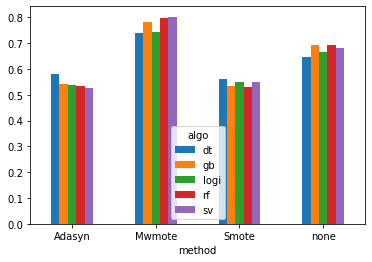

In [53]:
n_d.plot(kind = "bar", rot = 0)

In [54]:
method = ['none', 'none', 'none', 'none', 'none', 'Smote', 'Smote', 'Smote', 'Smote', 'Smote', 'Adasyn', 'Adasyn',
                              'Adasyn', 'Adasyn', 'Adasyn', 'Mwmote', 'Mwmote', 'Mwmote', 'Mwmote', 'Mwmote']
dat1 = pd.DataFrame({'f_1' : [lr0_f1, dt0_f1, rf0_f1, gb0_f1, sv0_f1, lr1_f1, dt1_f1, rf1_f1, gb1_f1, sv1_f1, lr2_f1, dt2_f1, rf2_f1, gb2_f1, sv2_f1, lr3_f1, dt3_f1, rf3_f1, gb3_f1,
                              sv3_f1],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb',
                            'svm', 'logi', 'dt', 'rf', 'gb', 'svm']}, index = method)
dat1

,f_1,algo
none,0.621677,logi
none,0.616858,dt
none,0.657371,rf
none,0.654618,gb
none,0.636735,svm
Smote,0.620979,logi
Smote,0.574790,dt
Smote,0.510949,rf
Smote,0.568254,gb
Smote,0.620112,svm


In [55]:
dat_bar1 = pd.DataFrame({'f_1' : [lr0_f1, dt0_f1, rf0_f1, gb0_f1, sv0_f1, lr1_f1, dt1_f1, rf1_f1, gb1_f1, sv1_f1, lr2_f1, dt2_f1, rf2_f1, gb2_f1, sv2_f1, lr3_f1, dt3_f1, rf3_f1, gb3_f1,
                              sv3_f1],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv',
                            'logi', 'dt', 'rf', 'gb', 'sv'],
                       'method' : method})

dat_bar1

,f_1,algo,method
0,0.621677,logi,none
1,0.616858,dt,none
2,0.657371,rf,none
3,0.654618,gb,none
4,0.636735,sv,none
5,0.620979,logi,Smote
6,0.574790,dt,Smote
7,0.510949,rf,Smote
8,0.568254,gb,Smote
9,0.620112,sv,Smote


<AxesSubplot:xlabel='method'>

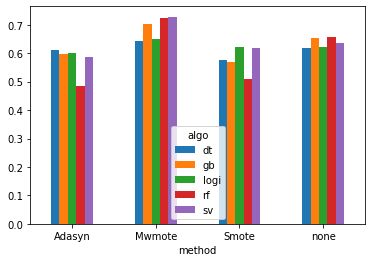

In [56]:
n_d1 = dat_bar1.pivot(index='method', columns='algo', values='f_1')
n_d1.plot(kind = "bar", rot = 0)

In [57]:
method = ['none', 'none', 'none', 'none', 'none', 'Smote', 'Smote', 'Smote', 'Smote', 'Smote', 'Adasyn', 'Adasyn',
                              'Adasyn', 'Adasyn', 'Adasyn', 'Mwmote', 'Mwmote', 'Mwmote', 'Mwmote', 'Mwmote']
dat2 = pd.DataFrame({'kappa' : [lr0_kappa, dt0_kappa, rf0_kappa, gb0_kappa, sv0_kappa, lr1_kappa, dt1_kappa, rf1_kappa, gb1_kappa, sv1_kappa, lr2_kappa, dt2_kappa, rf2_kappa, gb2_kappa, sv2_kappa, lr3_kappa, dt3_kappa, rf3_kappa, gb3_kappa,
                              sv3_kappa],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb',
                            'svm', 'logi', 'dt', 'rf', 'gb', 'svm']}, index = method)
dat2

,kappa,algo
none,0.335284,logi
none,0.289132,dt
none,0.384635,rf
none,0.383825,gb
none,0.360647,svm
Smote,0.093881,logi
Smote,0.121689,dt
Smote,0.055457,rf
Smote,0.066154,gb
Smote,0.090817,svm


In [58]:
dat_bar2 = pd.DataFrame({'kappa' : [lr0_kappa, dt0_kappa, rf0_kappa, gb0_kappa, sv0_kappa, lr1_kappa, dt1_kappa, rf1_kappa, gb1_kappa, sv1_kappa, lr2_kappa, dt2_kappa, rf2_kappa, gb2_kappa, sv2_kappa, lr3_kappa, dt3_kappa, rf3_kappa, gb3_kappa,
                              sv3_kappa],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv',
                            'logi', 'dt', 'rf', 'gb', 'sv'],
                       'method' : method})

dat_bar2

,kappa,algo,method
0,0.335284,logi,none
1,0.289132,dt,none
2,0.384635,rf,none
3,0.383825,gb,none
4,0.360647,sv,none
5,0.093881,logi,Smote
6,0.121689,dt,Smote
7,0.055457,rf,Smote
8,0.066154,gb,Smote
9,0.090817,sv,Smote


<AxesSubplot:xlabel='method'>

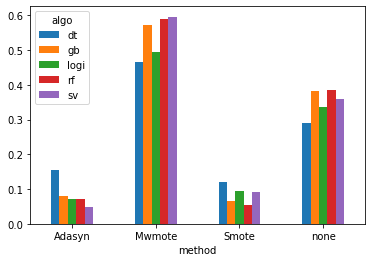

In [59]:
n_d2 = dat_bar2.pivot(index='method', columns='algo', values='kappa')
n_d2.plot(kind = "bar", rot = 0)

# Multiclass

In [187]:
f_data = n_data.drop(drugs, axis = 1)

In [188]:
for i in range(f_data.shape[0]):
    if f_data['Ethnicity'][i] == 'White':
        f_data['Ethnicity'][i] = 1
    elif f_data['Ethnicity'][i] == 'Other':
        f_data['Ethnicity'][i] = 2
    elif f_data['Ethnicity'][i] == 'Black':
        f_data['Ethnicity'][i] = 3
    elif f_data['Ethnicity'][i] == 'Asian':
        f_data['Ethnicity'][i] = 4
    else:
        f_data['Ethnicity'][i] = 5

In [189]:
f_data['Ethnicity'].value_counts()

1    1720
2      63
5      42
3      33
4      26
Name: Ethnicity, dtype: int64

# Smote for multiclass

In [190]:
f_data = n_data.drop(drugs, axis = 1)

In [191]:
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'])

In [192]:
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)

In [193]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

lr_m = roc_auc_score(y_test, lr_preds)
lr_m_f1 = f1_score(y_test, lr_preds)
lr_m_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr_m)
print(lr_m_f1)
print(lr_m_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.6614156372382355
0.6178861788617885
0.3251734503621213


array([[226,  83],
       [105, 152]])

In [195]:
gm_m_n = MetricFrame(metrics=roc_auc_score, y_true=y_test, y_pred=lr_preds, sensitive_features=X_test['Ethnicity'])
gm_m_n.by_group

KeyError: 'Ethnicity'

In [67]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train, y_train)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 24, random_state = 121)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)
dt_m = roc_auc_score(y_test, dt_preds)
dt_m_f1 = f1_score(y_test, dt_preds)
dt_m_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt_m)
print(dt_m_f1)
print(dt_m_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.6417085363857303
0.6222532834674425
0.6128341707277146
0.6053794718748818
Next
0.6446173800259404
0.6293616914107263
0.609232745268407
0.6021054487300568
Next
0.6293616914107263
0.5884691848906559
0.25965852363921293


array([[211,  98],
       [109, 148]])

In [68]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 12, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
rf_m = roc_auc_score(y_test, rf_preds)
rf_m_f1 = f1_score(y_test, rf_preds)
rf_m_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf_m)
print(rf_m_f1)
print(rf_m_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix

0.6905985166156674
0.665652978731442
0.6802349741226248
0.6876896729754574
Next
0.6905985166156674
0.665652978731442
0.6802349741226248
0.6876896729754574
Next
0.6721443592358933
0.6815256947854885
0.6844345384256987
0.6844345384256987
Next
0.6721443592358933
0.6815256947854885
0.6844345384256987
0.6844345384256987
Next
0.6876896729754574
0.6575342465753425
0.3757484086468772


array([[223,  86],
       [ 89, 168]])

In [69]:
n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train, y_train)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train, y_train)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)
gb_m = roc_auc_score(y_test, gb_preds)
gb_m_f1 = f1_score(y_test, gb_preds)
gb_m_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb_m)
print(gb_m_f1)
print(gb_m_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.6724339843602434
0.6734350798987571
Next
0.6889615050432549
0.6607986097994031
Next
0.6889615050432549
0.6519114688128773
0.380038241886262


array([[231,  78],
       [ 95, 162]])

In [70]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train, y_train)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train, y_train)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train, y_train)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 0.1, C = 1, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train, y_train)
sv_preds = sv_clf.predict(X_test)
sv_m = roc_auc_score(y_test, sv_preds)
sv_m_f1 = f1_score(y_test, sv_preds)
sv_m_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv_m)
print(sv_m_f1)
print(sv_m_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.5
0.6773072418873484
0.6571594071499628
Next
0.5240388853210433
0.6798886832130759
0.6724528729553095
Next
0.5493684913049501
0.6461788372180877
0.668561822371652
Next
0.6798886832130759
0.6411290322580645
0.3619101906390526


array([[229,  80],
       [ 98, 159]])

# smote

In [71]:
f_data = n_data.drop(drugs, axis = 1)


In [72]:
for i in range(f_data.shape[0]):
    if f_data['Ethnicity'][i] == 'White':
        f_data['Ethnicity'][i] = 1
    elif f_data['Ethnicity'][i] == 'Other':
        f_data['Ethnicity'][i] = 2
    elif f_data['Ethnicity'][i] == 'Black':
        f_data['Ethnicity'][i] = 3
    elif f_data['Ethnicity'][i] == 'Asian':
        f_data['Ethnicity'][i] = 4
    else:
        f_data['Ethnicity'][i] = 5

In [73]:
f_data['Ethnicity'] = f_data['Ethnicity'].astype('int')

In [74]:
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country'])

In [75]:
f_df['Ethnicity'] = f_df['Ethnicity'].astype('category')

In [76]:
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)

In [77]:
from sklearn.preprocessing import LabelEncoder
X_train['target'] = y_train
X_train_target = X_train['Ethnicity']
X_train_target = X_train_target.astype('object')
X_train_target = LabelEncoder().fit_transform(X_train_target)
X_train_predi = X_train.drop('Ethnicity', axis = 1)

In [78]:
smt = SMOTE(random_state = 121)
X_train_sm, y_train_sm = smt.fit_resample(X_train_predi, X_train_target)
X_train_sm['Ethnicity'] = y_train_sm
y_train_sm = X_train_sm['target']
X_train_sm = X_train_sm.drop('target', axis = 1)

In [79]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_sm, y_train_sm)
lr_preds = lr_clf.predict(X_test)

lr_m1 = roc_auc_score(y_test, lr_preds)
lr_m1_f1 = f1_score(y_test, lr_preds)
lr_m1_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr_m1)
print(lr_m1_f1)
print(lr_m1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.49474267437321345
0.6051282051282051
-0.00967230015406173


array([[ 22, 287],
       [ 21, 236]])

In [80]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train_sm, y_train_sm)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train_sm, y_train_sm)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 24, random_state = 121)
dt_clf.fit(X_train_sm, y_train_sm)
dt_preds = dt_clf.predict(X_test)
dt_m1 = roc_auc_score(y_test, dt_preds)
dt_m1_f1 = f1_score(y_test, dt_preds)
dt_m1_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt_m1)
print(dt_m1_f1)
print(dt_m1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.428733330814854
0.45682067167844054
0.45969173812851805
0.4570914082077242
Next
0.428733330814854
0.45325702340926544
0.42049160716759226
0.42374674171735105
Next
0.45325702340926544
0.46127366609294324
-0.09147926806727869


array([[119, 190],
       [123, 134]])

In [81]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_sm, y_train_sm)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 6, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train_sm, y_train_sm)
rf_preds = rf_clf.predict(X_test)
rf_m1 = roc_auc_score(y_test, rf_preds)
rf_m1_f1 = f1_score(y_test, rf_preds)
rf_m1_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf_m1)
print(rf_m1_f1)
print(rf_m1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix

0.4237845189074837
0.42062382733305625
0.44004130306121164
0.4063503456612897
Next
0.4237845189074837
0.42062382733305625
0.44004130306121164
0.4063503456612897
Next
0.4503292911739891
0.40924030070643347
0.41996902270409125
0.4387316938032816
Next
0.4503292911739891
0.40924030070643347
0.41996902270409125
0.4387316938032816
Next
0.4503292911739891
0.4529616724738676
-0.09742753757425326


array([[122, 187],
       [127, 130]])

In [82]:
n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train_sm, y_train_sm)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train_sm, y_train_sm)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train_sm, y_train_sm)
gb_preds = gb_clf.predict(X_test)
gb_m1 = roc_auc_score(y_test, gb_preds)
gb_m1_f1 = f1_score(y_test, gb_preds)
gb_m1_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb_m1)
print(gb_m1_f1)
print(gb_m1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.4053870273129085
0.41908125873597524
Next
0.4355898908239205
0.43657209776736805
Next
0.4355898908239205
0.5052316890881913
-0.12259866016322518


array([[ 66, 243],
       [ 88, 169]])

In [83]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_sm, y_train_sm)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_sm, y_train_sm)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_sm, y_train_sm)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 1, C = 0.1, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train_sm, y_train_sm)
sv_preds = sv_clf.predict(X_test)
sv_m1 = roc_auc_score(y_test, sv_preds)
sv_m1_f1 = f1_score(y_test, sv_preds)
sv_m1_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv_m1)
print(sv_m1_f1)
print(sv_m1_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.5
0.4848891239469608
0.4619646657348293
Next
0.4987092793371362
0.4182942339415461
0.4586087920113835
Next
0.4954730333824437
0.4516577890269855
0.4560462392807223
Next
0.5
0.0
0.0


array([[309,   0],
       [257,   0]])

# Adasyn

In [84]:
f_data = n_data.drop(drugs, axis = 1)
for i in range(f_data.shape[0]):
    if f_data['Ethnicity'][i] == 'White':
        f_data['Ethnicity'][i] = 1
    elif f_data['Ethnicity'][i] == 'Other':
        f_data['Ethnicity'][i] = 2
    elif f_data['Ethnicity'][i] == 'Black':
        f_data['Ethnicity'][i] = 3
    elif f_data['Ethnicity'][i] == 'Asian':
        f_data['Ethnicity'][i] = 4
    else:
        f_data['Ethnicity'][i] = 5
f_data['Ethnicity'] = f_data['Ethnicity'].astype('int')
f_df = pd.get_dummies(f_data, prefix = ['Age', 'Gender', 'Education', 'Country'])
f_df['Ethnicity'] = f_df['Ethnicity'].astype('category')
f_df_target = f_df['target']
f_df_predi = f_df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(f_df_predi, f_df_target, test_size = 0.3, random_state = 121)
from sklearn.preprocessing import LabelEncoder
X_train['target'] = y_train
X_train_target = X_train['Ethnicity']
X_train_target = X_train_target.astype('object')
X_train_target = LabelEncoder().fit_transform(X_train_target)
X_train_predi = X_train.drop('Ethnicity', axis = 1)

In [85]:
ada = ADASYN(random_state = 121)
X_train_ada, y_train_ada = ada.fit_resample(X_train_predi, X_train_target)
X_train_ada['Ethnicity'] = y_train_ada
y_train_ada = X_train_ada['target']
X_train_ada = X_train_ada.drop('target', axis = 1)

In [86]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_ada, y_train_ada)
lr_preds = lr_clf.predict(X_test)

lr_m2 = roc_auc_score(y_test, lr_preds)
lr_m2_f1 = f1_score(y_test, lr_preds)
lr_m2_kappa = cohen_kappa_score(y_test, lr_preds)
print(lr_m2)
print(lr_m2_f1)
print(lr_m2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
confusion_matrix

0.4937604674297659
0.6020671834625323
-0.011500121847910716


array([[ 25, 284],
       [ 24, 233]])

In [87]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 121)
    dt_clf.fit(X_train_ada, y_train_ada)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 24, random_state = 121)
    dt_clf.fit(X_train_ada, y_train_ada)
    dt_preds = dt_clf.predict(X_test)
    dt = roc_auc_score(y_test, dt_preds)
    print(dt)
print("Next")
dt_clf = DecisionTreeClassifier(max_depth = 12, min_samples_split = 24, random_state = 121)
dt_clf.fit(X_train_ada, y_train_ada)
dt_preds = dt_clf.predict(X_test)
dt_m2 = roc_auc_score(y_test, dt_preds)
dt_m2_f1 = f1_score(y_test, dt_preds)
dt_m2_kappa = cohen_kappa_score(y_test, dt_preds)

print(dt_m2)
print(dt_m2_f1)
print(dt_m2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
confusion_matrix

0.5547706294939116
0.5457166962587989
0.5482981375845264
0.5612431214032967
Next
0.5547706294939116
0.5457166962587989
0.5482981375845264
0.565770088020853
Next
0.565770088020853
0.599686028257457
0.12644805171224183


array([[120, 189],
       [ 66, 191]])

In [88]:
max_depths = [6, 8, 10, 12]

for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 16, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")
for depth in max_depths:
    rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= depth, min_samples_leaf = 24, min_samples_split = 24, random_state = 121)
    rf_clf.fit(X_train_ada, y_train_ada)
    rf_preds = rf_clf.predict(X_test)
    rf = roc_auc_score(y_test, rf_preds)
    print(rf)
print("Next")


rf_clf = RandomForestClassifier(n_estimators = 100, max_depth= 6, min_samples_leaf = 24, min_samples_split = 16, random_state = 121)
rf_clf.fit(X_train_ada, y_train_ada)
rf_preds = rf_clf.predict(X_test)
rf_m2 = roc_auc_score(y_test, rf_preds)
rf_m2_f1 = f1_score(y_test, rf_preds)
rf_m2_kappa = cohen_kappa_score(y_test, rf_preds)

print(rf_m2)
print(rf_m2_f1)
print(rf_m2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
confusion_matrix

0.42790852883029223
0.42669336254769363
0.4315288428846663
0.4137294901338572
Next
0.42790852883029223
0.42669336254769363
0.4315288428846663
0.4137294901338572
Next
0.4337262161107123
0.41962273179454246
0.4179479430319972
0.4286388878395224
Next
0.4337262161107123
0.41962273179454246
0.4179479430319972
0.4286388878395224
Next
0.4337262161107123
0.3946869070208729
-0.1319858058206167


array([[143, 166],
       [153, 104]])

In [89]:
n_estim = [100, 500]

for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.05, random_state = 121)
    gb_clf.fit(X_train_ada, y_train_ada)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")
for n in n_estim:
    gb_clf = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.1, random_state = 121)
    gb_clf.fit(X_train_ada, y_train_ada)
    gb_preds = gb_clf.predict(X_test)
    gb = roc_auc_score(y_test, gb_preds)
    print(gb)
print("Next")

gb_clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 121)
gb_clf.fit(X_train_ada, y_train_ada)
gb_preds = gb_clf.predict(X_test)
gb_m2 = roc_auc_score(y_test, gb_preds)
gb_m2_f1 = f1_score(y_test, gb_preds)
gb_m2_kappa = cohen_kappa_score(y_test, gb_preds)
print(gb_m2)
print(gb_m2_f1)
print(gb_m2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, gb_preds)
confusion_matrix

0.41318801707528996
0.4333547404077418
Next
0.4342802815659904
0.44238978504778814
Next
0.44238978504778814
0.5097451274362819
-0.10972407094290748


array([[ 69, 240],
       [ 87, 170]])

In [90]:
from sklearn import svm

gamma = [1, 0.1, 0.01]
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 0.1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_ada, y_train_ada)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 1, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_ada, y_train_ada)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")
for gam in gamma:
    sv_clf = svm.SVC(gamma = gam, C = 10, kernel = 'rbf', random_state = 121)
    sv_clf.fit(X_train_ada, y_train_ada)
    sv_preds = sv_clf.predict(X_test)
    sv = roc_auc_score(y_test, sv_preds)
    print(sv)
print("Next")

sv_clf = svm.SVC(gamma = 1, C = 1, kernel = 'rbf', random_state = 121)
sv_clf.fit(X_train_ada, y_train_ada)
sv_preds = sv_clf.predict(X_test)
sv_m2 = roc_auc_score(y_test, sv_preds)
sv_m2_f1 = f1_score(y_test, sv_preds)
sv_m2_kappa = cohen_kappa_score(y_test, sv_preds)
print(sv_m2)
print(sv_m2_f1)
print(sv_m2_kappa)
confusion_matrix = metrics.confusion_matrix(y_test, sv_preds)
confusion_matrix

0.5
0.48094140757810433
0.44148942868296126
Next
0.5003274023144826
0.4367295027262539
0.45144371828290075
Next
0.4954730333824437
0.4600191404430005
0.44888116555223956
Next
0.5003274023144826
0.007722007722007722
0.0007144525507331023


array([[308,   1],
       [256,   1]])

# Cannot use for multilabel situation

In [91]:
method = ['none', 'none', 'none', 'none', 'none', 'Smote', 'Smote', 'Smote', 'Smote', 'Smote', 'Adasyn', 'Adasyn',
                              'Adasyn', 'Adasyn', 'Adasyn']
dat3 = pd.DataFrame({'rc_ac' : [lr_m, dt_m, rf_m, gb_m, sv_m, lr_m1, dt_m1, rf_m1, gb_m1, sv_m1, lr_m2, dt_m2, rf_m2, gb_m2, sv_m2],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb',
                            'svm']}, index = method)
dat3

,rc_ac,algo
none,0.661416,logi
none,0.629362,dt
none,0.687690,rf
none,0.688962,gb
none,0.679889,svm
Smote,0.494743,logi
Smote,0.453257,dt
Smote,0.450329,rf
Smote,0.435590,gb
Smote,0.500000,svm


# Multi

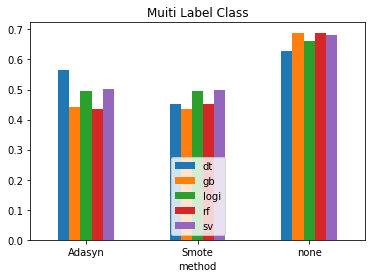

In [92]:
dat_bar3 = pd.DataFrame({'rc_ac' : [lr_m, dt_m, rf_m, gb_m, sv_m, lr_m1, dt_m1, rf_m1, gb_m1,sv_m1, lr_m2, dt_m2, rf_m2, gb_m2, sv_m2],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv'],
                       'method' : method})
n_d3 = dat_bar3.pivot(index='method', columns='algo', values='rc_ac')
n_d3.plot(kind = "bar", rot = 0, title = "Muiti Label Class")
plt.legend(loc='lower center')


In [93]:
method = ['none', 'none', 'none', 'none', 'none', 'Smote', 'Smote', 'Smote', 'Smote', 'Smote', 'Adasyn', 'Adasyn',
                              'Adasyn', 'Adasyn', 'Adasyn']
dat4 = pd.DataFrame({'f1' : [lr_m_f1, dt_m_f1, rf_m_f1, gb_m_f1, sv_m_f1, lr_m1_f1, dt_m1_f1, rf_m1_f1, gb_m1_f1, sv_m1_f1, lr_m2_f1, dt_m2_f1, rf_m2_f1, gb_m2_f1, sv_m2_f1],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb',
                            'svm']}, index = method)
dat4

,f1,algo
none,0.617886,logi
none,0.588469,dt
none,0.657534,rf
none,0.651911,gb
none,0.641129,svm
Smote,0.605128,logi
Smote,0.461274,dt
Smote,0.452962,rf
Smote,0.505232,gb
Smote,0.000000,svm


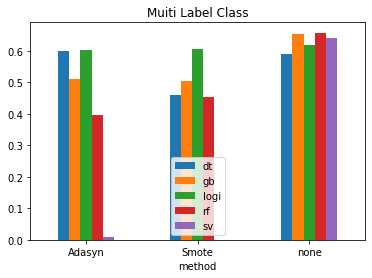

In [94]:
dat_bar4 = pd.DataFrame({'f1' : [lr_m_f1, dt_m_f1, rf_m_f1, gb_m_f1, sv_m_f1, lr_m1_f1, dt_m1_f1, rf_m1_f1, gb_m1_f1, sv_m1_f1, lr_m2_f1, dt_m2_f1, rf_m2_f1, gb_m2_f1, sv_m2_f1],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv'],
                       'method' : method})
n_d4 = dat_bar4.pivot(index='method', columns='algo', values='f1')
n_d4.plot(kind = "bar", rot = 0, title = "Muiti Label Class")
plt.legend(loc='lower center')


In [95]:
method = ['none', 'none', 'none', 'none', 'none', 'Smote', 'Smote', 'Smote', 'Smote', 'Smote', 'Adasyn', 'Adasyn',
                              'Adasyn', 'Adasyn', 'Adasyn']
dat5 = pd.DataFrame({'kappa' : [lr_m_kappa, dt_m_kappa, rf_m_kappa, gb_m_kappa, sv_m_kappa, lr_m1_kappa, dt_m1_kappa, rf_m1_kappa, gb_m1_kappa, sv_m1_kappa, lr_m2_kappa, dt_m2_kappa, rf_m2_kappa, gb_m2_kappa, sv_m2_kappa],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb', 'svm', 'logi', 'dt', 'rf', 'gb',
                            'svm']}, index = method)
dat5

,kappa,algo
none,0.325173,logi
none,0.259659,dt
none,0.375748,rf
none,0.380038,gb
none,0.361910,svm
Smote,-0.009672,logi
Smote,-0.091479,dt
Smote,-0.097428,rf
Smote,-0.122599,gb
Smote,0.000000,svm


<AxesSubplot:title={'center':'Muiti Label Class'}, xlabel='method'>

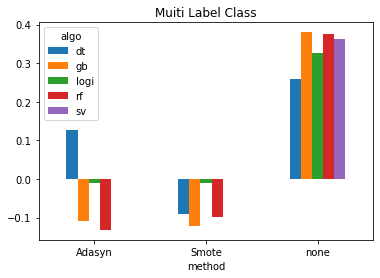

In [96]:
dat_bar5 = pd.DataFrame({'kappa' : [lr_m_kappa, dt_m_kappa, rf_m_kappa, gb_m_kappa, sv_m_kappa, lr_m1_kappa, dt_m1_kappa, rf_m1_kappa, gb_m1_kappa, sv_m1_kappa, lr_m2_kappa, dt_m2_kappa, rf_m2_kappa, gb_m2_kappa, sv_m2_kappa],
                   'algo' : ['logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv', 'logi', 'dt', 'rf', 'gb', 'sv'],
                       'method' : method})
n_d5 = dat_bar5.pivot(index='method', columns='algo', values='kappa')
n_d5.plot(kind = "bar", rot = 0, title = "Muiti Label Class")

# Single

<AxesSubplot:title={'center':'Binary Label Class'}, xlabel='method'>

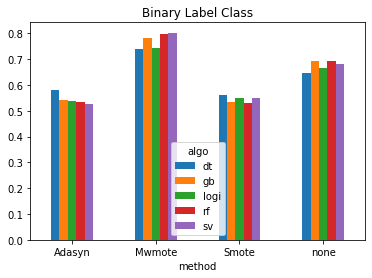

In [97]:
n_d.plot(kind = "bar", rot = 0, title = "Binary Label Class")

In [98]:
f_data = n_data.drop(drugs, axis = 1)
f_data['Ethnicity'] = np.where(f_data['Ethnicity'] == 'White', "White", "Non-White")
pca_dataset = f_data
pca_dataset

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,target
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [99]:
pca_dataset = pca_dataset[["Nscore", "Escore", "Oscore", "AScore", "Impulsive", "SS", "Ethnicity"]]
pca_dataset['Ethnicity'].value_counts() 

White        1720
Non-White     164
Name: Ethnicity, dtype: int64

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 2)
scaled_data = StandardScaler().fit_transform(pca_dataset.iloc[:, :-1])
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

In [101]:
pca_columns = ['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(data_pca, columns = pca_columns)
df_pca['target'] = pca_dataset['Ethnicity']


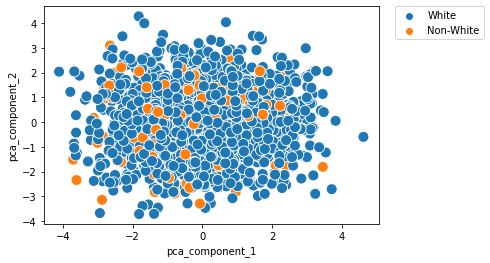

In [102]:
import seaborn as sns
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='target', data=df_pca, ax=ax,s=120)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

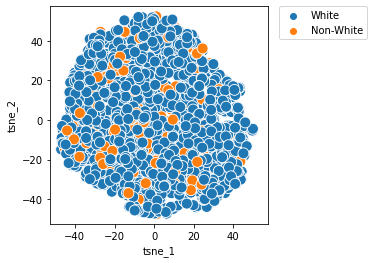

In [103]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(pca_dataset.iloc[:, :-1])
tsne_result.shape
 

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': pca_dataset['Ethnicity']})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [104]:
f_data = n_data.drop(drugs, axis = 1)
for i in range(f_data.shape[0]):
    if f_data['Ethnicity'][i] == 'White':
        f_data['Ethnicity'][i] = "White"
    elif f_data['Ethnicity'][i] == 'Other':
        f_data['Ethnicity'][i] = "Other"
    elif f_data['Ethnicity'][i] == 'Black':
        f_data['Ethnicity'][i] = 'Black'
    elif f_data['Ethnicity'][i] == 'Asian':
        f_data['Ethnicity'][i] = "Asian"
    else:
        f_data['Ethnicity'][i] = "Mixed"

In [105]:
pca_dataset1 = f_data[["Nscore", "Escore", "Oscore", "AScore", "Impulsive", "SS", "Ethnicity"]]
pca_dataset1['Ethnicity'].value_counts()

White    1720
Other      63
Mixed      42
Black      33
Asian      26
Name: Ethnicity, dtype: int64

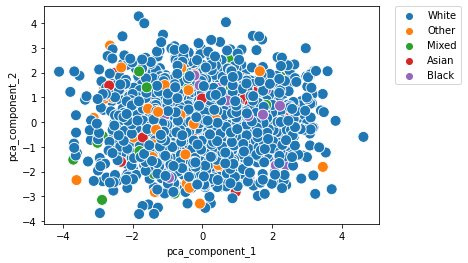

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 2)
scaled_data = StandardScaler().fit_transform(pca_dataset1.iloc[:, :-1])
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
pca_columns = ['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(data_pca, columns = pca_columns)
df_pca['target'] = pca_dataset1['Ethnicity']
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='target', data=df_pca, ax=ax,s=120)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

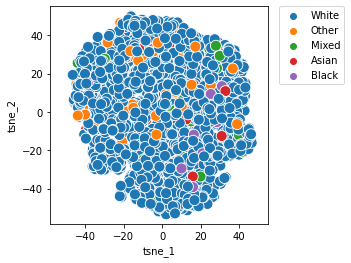

In [107]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(pca_dataset1.iloc[:, :-1])
tsne_result.shape
 

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': pca_dataset1['Ethnicity']})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [108]:
# change color of multi class and change the name of label. Start writing the paper. Implemenation , pca tsne ,and methodology

random forest number of trees = 100, svm: rbf kernel, regularization: 1.0, gbm: number of estimators: 100, loss: log loss function